# Transporter analysis of bacillus mother-spore

In [2]:
from __future__ import print_function, division, absolute_import

import sys

import qminospy
from qminospy.me2 import ME_NLP

# python imports
from copy import copy
import re
from os.path import join, dirname, abspath
import sys
sys.path.append('/home/UCSD/cobra_utils')
from collections import defaultdict
import pickle

# third party imports
import pandas
import cobra
from tqdm import tqdm
import numpy as np
import scipy

# COBRAme
import cobrame
from cobrame.util import building, mu, me_model_interface
from cobrame.io.json import save_json_me_model, save_reduced_json_me_model

# ECOLIme
import bacillusme
from bacillusme import (transcription, translation, flat_files, generics, formulas, compartments)
from cobrame.util.helper_functions import *

import copy
from scipy import stats
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
print(cobra.__file__)
print(cobrame.__file__)
print(bacillusme.__file__)
ecoli_files = dirname(abspath(bacillusme.__file__))
pd.set_option('display.max_colwidth', None)

/home/jt/me_modeling/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/sbml3.py:24: UserWarning: Install lxml for faster SBML I/O
  warn("Install lxml for faster SBML I/O")
/home/jt/me_modeling/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/__init__.py:12: UserWarning: cobra.io.sbml requires libsbml
  warn("cobra.io.sbml requires libsbml")


/home/jt/me_modeling/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/__init__.py
/home/jt/UCSD/cobrame/cobrame/__init__.py
/home/jt/UCSD/bacillusme-master/bacillusme/__init__.py


In [3]:
with open("../../me_models/solution.pickle", "rb") as outfile:
    me = pickle.load(outfile)

### Closing mechanisms

In [4]:
with open("./sporeme_solution_v4_proteomics.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [5]:
main_mechanisms = [ 'ACKr_REV_BSU29470-MONOMER',
                    'PGK_REV_BSU33930-MONOMER',
                    'PYK_FWD_BSU29180-MONOMER_mod_mn2_mod_k']

In [6]:
for r in main_mechanisms:
    sporeme.reactions.get_by_id(r).bounds = (0,0)
    sporeme.reactions.get_by_id(r+'_s').bounds = (0,0)

In [7]:
version = 'v5_KO_ACK_PGK_PYK'

In [9]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 248.511381 seconds
Finished substituting S,lb,ub in 7.094637 seconds
Finished makeME_LP in 1.522246 seconds
Getting MINOS parameters from ME_NLP...
1 0.0 0.0 0.05 0.05 1
Finished substituting S,lb,ub in 7.121589 seconds
Finished makeME_LP in 1.508124 seconds
Getting MINOS parameters from ME_NLP...
2 0.0 0.0 0.025 0.025 1
Finished substituting S,lb,ub in 7.103040 seconds
Finished makeME_LP in 1.499345 seconds
Getting MINOS parameters from ME_NLP...
3 0.0 0.0 0.0125 0.0125 1
Finished substituting S,lb,ub in 7.101150 seconds
Finished makeME_LP in 1.501006 seconds
Getting MINOS parameters from ME_NLP...
4 0.00625 0.00625 0.0125 0.00625 optimal
Finished substituting S,lb,ub in 7.148437 seconds
Finished makeME_LP in 1.523553 seconds
Getting MINOS parameters from ME_NLP...
5 0.009375000000000001 0.009375000000000001 0.0125 0.009375000000000001 optimal
Finished substituting S,lb,ub in 7.080312 seconds
Finished make

In [10]:
sporeme.solution.x_dict['biomass_dilution_s']

0.010156250000000002

In [11]:
sporeme.reactions.get_by_id('PRPPS_REV_BSU00510-MONOMER_mod_mn2_mod_pi_s').bounds = (0,0)
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 247.352470 seconds
Finished substituting S,lb,ub in 7.186478 seconds
Finished makeME_LP in 1.510343 seconds
Getting MINOS parameters from ME_NLP...
1 0.0 0.0 0.05 0.05 1
Finished substituting S,lb,ub in 7.239314 seconds
Finished makeME_LP in 1.509732 seconds
Getting MINOS parameters from ME_NLP...
2 0.0 0.0 0.025 0.025 1
Finished substituting S,lb,ub in 7.224814 seconds
Finished makeME_LP in 1.514063 seconds
Getting MINOS parameters from ME_NLP...
3 0.0 0.0 0.0125 0.0125 1
Finished substituting S,lb,ub in 7.171512 seconds
Finished makeME_LP in 1.501719 seconds
Getting MINOS parameters from ME_NLP...
4 0.0 0.0 0.00625 0.00625 1
Finished substituting S,lb,ub in 7.181740 seconds
Finished makeME_LP in 1.519977 seconds
Getting MINOS parameters from ME_NLP...
5 0.0 0.0 0.003125 0.003125 1
Finished substituting S,lb,ub in 7.212373 seconds
Finished makeME_LP in 1.506061 seconds
Getting MINOS parameters from ME_NLP.

In [145]:
if sporeme.solution: sporeme.solution.x_dict['biomass_dilution_s']

### GK

In [87]:
with open("./sporeme_solution_v3.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [88]:
for r in sporeme.reactions.query(re.compile('BSU15680-MONOMER.*_s$')):
    print(r.id)
    r.bounds = (0,0)

formation_BSU15680-MONOMER_mod_mg2_s
DGK1_REV_BSU15680-MONOMER_mod_mg2_s
DGK1_FWD_BSU15680-MONOMER_mod_mg2_s
GK1_REV_BSU15680-MONOMER_mod_mg2_s
GK1_FWD_BSU15680-MONOMER_mod_mg2_s
GK2_REV_BSU15680-MONOMER_mod_mg2_s
GK2_FWD_BSU15680-MONOMER_mod_mg2_s


In [89]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 249.921906 seconds
Finished substituting S,lb,ub in 7.332601 seconds
Finished makeME_LP in 1.530706 seconds
Getting MINOS parameters from ME_NLP...
1 0.0 0.0 0.05 0.05 1
Finished substituting S,lb,ub in 7.339327 seconds
Finished makeME_LP in 1.531912 seconds
Getting MINOS parameters from ME_NLP...
2 0.0 0.0 0.025 0.025 1
Finished substituting S,lb,ub in 7.365429 seconds
Finished makeME_LP in 1.534005 seconds
Getting MINOS parameters from ME_NLP...


KeyboardInterrupt: 

In [ ]:
if sporeme.solution: sporeme.solution.x_dict['biomass_dilution_s']

In [81]:
flux_based_reactions(sporeme,'fum_c',only_types=['MetabolicReaction']).head(10)

,lb,ub,rxn_flux,met_flux,reaction
FUM_FWD_BSU33040-MONOMER,0,999999,2.31881,-2.31881,fum_c + h2o_c --> -2.39256977563745e-6*sigma BSU33040-MONOMER + mal__L_c
SUCD1_FWD_CPLX8J2-15,0,999999,2.28039,2.28039,fad_c + succ_c --> -4.27350427350427e-6*sigma CPLX8J2-15 + fadh2_c + fum_c
ADSL2r_FWD_BSU06440-MONOMER,0,999999,0.0161137,0.0161137,25aics_c --> -1.06664492347285e-5*sigma BSU06440-MONOMER + aicar_c + fum_c
ADSL1r_FWD_BSU06440-MONOMER,0,999999,0.0141867,0.0141867,dcamp_c --> -4.27350427350427e-6*sigma BSU06440-MONOMER + amp_c + fum_c
ARGSL_FWD_BSU29440-MONOMER,0,999999,0.00811811,0.00811811,argsuc_c --> -1.02894591975503e-5*sigma BSU29440-MONOMER + arg__L_c + fum_c
ADSL2r_REV_BSU06440-MONOMER,0,999999,0,-0,aicar_c + fum_c --> 25aics_c + -1.06664492347285e-5*sigma BSU06440-MONOMER
FUMt2r_FWD_BSU04470-MONOMER,0,999999,0,0,fum_e + h_e --> -4.27350427350427e-6*sigma BSU04470-MONOMER + fum_c + h_c
FUMt2r_REV_BSU07570-MONOMER_s,0,999999,0,0,fum_s + h_s --> -4.27350427350427e-6*sigma BSU07570-MONOMER_s + fum_c + h_c
FUMt2r_FWD_BSU07570-MONOMER_s,0,999999,0,-0,fum_c + h_c --> -4.27350427350427e-6*sigma BSU07570-MONOMER_s + fum_s + h_s
FUMt2r_REV_BSU04470-MONOMER_s,0,999999,0,0,fum_s + h_s --> -4.27350427350427e-6*sigma BSU04470-MONOMER_s + fum_c + h_c


### CYTK

In [90]:
with open("./sporeme_solution_v3.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [91]:
for r in sporeme.reactions.query('BSU22890-MONOMER'):
    print(r.id)
    r.bounds = (0,0)

formation_BSU22890-MONOMER_mod_mg2
CYTK1_REV_BSU22890-MONOMER_mod_mg2
CYTK1_FWD_BSU22890-MONOMER_mod_mg2
CYTK2_REV_BSU22890-MONOMER_mod_mg2
CYTK2_FWD_BSU22890-MONOMER_mod_mg2
UMPK_FWD_BSU22890-MONOMER_mod_mg2
URIDK2r_copy1_FWD_BSU22890-MONOMER_mod_mg2
formation_BSU22890-MONOMER_mod_mg2_s
CYTK1_REV_BSU22890-MONOMER_mod_mg2_s
CYTK1_FWD_BSU22890-MONOMER_mod_mg2_s
CYTK2_REV_BSU22890-MONOMER_mod_mg2_s
CYTK2_FWD_BSU22890-MONOMER_mod_mg2_s
UMPK_FWD_BSU22890-MONOMER_mod_mg2_s
URIDK2r_copy1_FWD_BSU22890-MONOMER_mod_mg2_s


In [146]:
for r in sporeme.reactions.query(re.compile('BSU37150-MONOMER.*_s$')):
    print(r.id,r.reaction)
    r.bounds = (0,0)

formation_BSU37150-MONOMER_mod_mg2_s mg2_s + 4.0 protein_BSU37150_s --> BSU37150-MONOMER_mod_mg2_s + 0.04861 prosthetic_group_biomass_s
CTPS1_FWD_BSU37150-MONOMER_mod_mg2_s atp_s + nh4_s + utp_s --> -4.27350427350427e-6*sigma BSU37150-MONOMER_mod_mg2_s + adp_s + ctp_s + 2.0 h_s + pi_s
CTPS2_FWD_BSU37150-MONOMER_mod_mg2_s atp_s + gln__L_s + h2o_s + utp_s --> -3.27559071090038e-6*sigma BSU37150-MONOMER_mod_mg2_s + adp_s + ctp_s + glu__L_s + 2.0 h_s + pi_s


In [93]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 251.678204 seconds
Finished substituting S,lb,ub in 7.290562 seconds
Finished makeME_LP in 1.530940 seconds
Getting MINOS parameters from ME_NLP...
1 0.0 0.0 0.05 0.05 1
Finished substituting S,lb,ub in 7.328154 seconds
Finished makeME_LP in 1.526656 seconds
Getting MINOS parameters from ME_NLP...
2 0.0 0.0 0.025 0.025 1
Finished substituting S,lb,ub in 7.262715 seconds
Finished makeME_LP in 1.528114 seconds
Getting MINOS parameters from ME_NLP...
3 0.0 0.0 0.0125 0.0125 1
Finished substituting S,lb,ub in 7.295166 seconds
Finished makeME_LP in 1.525097 seconds
Getting MINOS parameters from ME_NLP...
4 0.0 0.0 0.00625 0.00625 1
Finished substituting S,lb,ub in 7.310462 seconds
Finished makeME_LP in 1.527177 seconds
Getting MINOS parameters from ME_NLP...
5 0.0 0.0 0.003125 0.003125 1
Finished substituting S,lb,ub in 7.304533 seconds
Finished makeME_LP in 1.531065 seconds
Getting MINOS parameters from ME_NLP.

In [94]:
if sporeme.solution: sporeme.solution.x_dict['biomass_dilution_s']

In [98]:
flux_based_reactions(sporeme,'ctp_s',only_types=['MetabolicReaction'])

,lb,ub,rxn_flux,met_flux,reaction
NDPK3_FWD_BSU22730-MONOMER_mod_mn2_s,0,999999,0.10809,0.10809,atp_s + cdp_s --> -4.27350427350427e-6*sigma BSU22730-MONOMER_mod_mn2_s + adp_s + ctp_s
G3PCT_FWD_BSU35740-MONOMER_s,0,999999,0.0966749,-0.0966749,ctp_s + glyc3p_s + h_s --> -4.27350427350427e-6*sigma BSU35740-MONOMER_s + cdpglyc_s + ppi_s
PHCYT_BS_FWD_BSU16540-MONOMER_mod_mg2_mod_k_s,0,999999,0.00670795,-0.00670795,0.01 12dag3p_BS_s + ctp_s + h_s --> -1.54262689436083e-5*sigma BSU16540-MONOMER_mod_mg2_mod_k_s + 0.01 cdpdag_BS_s + ppi_s
MEPCT_FWD_BSU00900-MONOMER_mod_mn2_s,0,999999,0.000107983,-0.000107983,2me4p_s + ctp_s + h_s --> 4c2me_s + -1.03246272317615e-5*sigma BSU00900-MONOMER_mod_mn2_s + ppi_s
PPNCL_FWD_BSU15700-MONOMER_s,0,999999,0,-0,4ppan_s + ctp_s + cys__L_s --> 4ppcys_s + -3.22695132810028e-6*sigma BSU15700-MONOMER_s + cdp_s + h_s + pi_s
G3PCT_FWD_CPLX-5322_s,0,999999,0,-0,ctp_s + glyc3p_s + h_s --> -0.000185492911781972*sigma CPLX-5322_s + cdpglyc_s + ppi_s
NDPK3_REV_BSU22730-MONOMER_mod_mn2_s,0,999999,0,-0,adp_s + ctp_s --> -4.27350427350427e-6*sigma BSU22730-MONOMER_mod_mn2_s + atp_s + cdp_s
CTPS2_FWD_BSU37150-MONOMER_mod_mg2_s,0,999999,0,0,atp_s + gln__L_s + h2o_s + utp_s --> -3.27559071090038e-6*sigma BSU37150-MONOMER_mod_mg2_s + adp_s + ctp_s + glu__L_s + 2.0 h_s + pi_s
CTPS1_FWD_BSU37150-MONOMER_mod_mg2_s,0,999999,0,0,atp_s + nh4_s + utp_s --> -4.27350427350427e-6*sigma BSU37150-MONOMER_mod_mg2_s + adp_s + ctp_s + 2.0 h_s + pi_s
BIOMASS_BS_10_FWD_CPLX_dummy_s,0,0,0,-0,0.000367 10fthf_s + 0.266902 ala__L_s + 0.00467 amp_s + 0.193021 arg__L_s + 0.147987 asn__L_s + 0.148014 asp__L_s + 105.053483 atp_s + 0.003205 ca2_s + 5e-06 cdlp_BS_s + 0.000251 cdp_s + 0.001042 cmp_s + 0.038902 ctp_s + 0.05699 cys__L_s + 0.00011 d12dg_BS_s + 0.022982 datp_s + 0.01738 dctp_s + 0.017398 dgtp_s + 0.022899 dttp_s + 0.00345 fe3_s + 0.00018 gdp_s + 0.260335 gln__L_s + 0.260378 glu__L_s + 0.408288 gly_s + 0.000503 gmp_s + 0.003624 gtca1_45_BS_s + 0.002347 gtca2_45_BS_s + 0.001819 gtca3_45_BS_s + 0.062667 gtp_s + 105.0 h2o_s + 0.081739 his__L_s + 0.269905 ile__L_s + 0.706312 k_s + 0.346445 leu__L_s + 7e-06 lipo1_24_BS_s + 6e-06 lipo2_24_BS_s + 1.8e-05 lipo3_24_BS_s + 1.5e-05 lipo4_24_BS_s + 0.323093 lys__L_s + 2.2e-05 lysylpgly_BS_s + 8.6e-05 m12dg_BS_s + 0.113326 met__L_s + 0.101714 mg2_s + 0.000266 mql7_s + 0.016164 nad_s + 0.000934 nadp_s + 0.000216 nadph_s + 0.101817 peptido_BS_s + 0.000176 pgly_BS_s + 0.175939 phe__L_s + 0.000918 ppi_s + 0.160642 pro__L_s + 0.00056 psetha_BS_s + 0.216213 ser__L_s + 6.6e-05 t12dg_BS_s + 0.003112 tcam_BS_s + 0.186317 thr__L_s + 0.054336 trp__L_s + 0.110824 tyr__L_s + 0.041501 utp_s + 0.306734 val__L_s --> -4.27350427350427e-6*sigma CPLX_dummy_s + 104.997414 adp_s + 105.0 h_s + 104.985613 pi_s


In [62]:
flux_based_reactions(sporeme,'cbp_c',only_types=['MetabolicReaction'])

,lb,ub,rxn_flux,met_flux,reaction
CBPS_FWD_CPLX8J2-5,0,999999,0.0251957,0.0251957,2.0 atp_c + gln__L_c + h2o_c + hco3_c --> -4.27350427350427e-6*sigma CPLX8J2-5 + 2.0 adp_c + cbp_c + glu__L_c + 2.0 h_c + pi_c
ASPCT_FWD_BSU15490-MONOMER,0,999999,0.0170776,-0.0170776,asp__L_c + cbp_c --> -1.40657082016779e-5*sigma BSU15490-MONOMER + cbasp_c + h_c + pi_c
OCBT_1_FWD_BSU11250-MONOMER,0,999999,0.00811811,-0.00811811,cbp_c + orn__L_c --> -1.39331395579107e-5*sigma BSU11250-MONOMER + citr__L_c + h_c + pi_c
OCBT_1_REV_BSU11250-MONOMER,0,999999,0,0,citr__L_c + h_c + pi_c --> -1.39331395579107e-5*sigma BSU11250-MONOMER + cbp_c + orn__L_c
CBPS_FWD_CPLX8J2-6_mod_zn2,0,999999,0,0,2.0 atp_c + gln__L_c + h2o_c + hco3_c --> -2.65848692994324e-6*sigma CPLX8J2-6_mod_zn2 + 2.0 adp_c + cbp_c + glu__L_c + 2.0 h_c + pi_c


### Methionine

In [113]:
with open("./sporeme_solution_v3.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [114]:
for r in get_transport_reactions(sporeme,'met__L_s',comps=['c','s']):
    print(r.id)
    r.bounds = (0,0)

METabc_FWD_CPLX8J2-67_s


In [115]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 250.193434 seconds
Finished substituting S,lb,ub in 7.382745 seconds
Finished makeME_LP in 1.537819 seconds
Getting MINOS parameters from ME_NLP...
1 0.05 0.05 0.1 0.05 optimal
Finished substituting S,lb,ub in 7.362918 seconds
Finished makeME_LP in 1.532017 seconds
Getting MINOS parameters from ME_NLP...
2 0.05 0.05 0.07500000000000001 0.07500000000000001 1
Finished substituting S,lb,ub in 7.196329 seconds
Finished makeME_LP in 1.528339 seconds
Getting MINOS parameters from ME_NLP...
3 0.05 0.05 0.0625 0.0625 1
Finished substituting S,lb,ub in 7.299746 seconds
Finished makeME_LP in 1.532322 seconds
Getting MINOS parameters from ME_NLP...
4 0.05625 0.05625 0.0625 0.05625 optimal
Finished substituting S,lb,ub in 7.141644 seconds
Finished makeME_LP in 1.523025 seconds
Getting MINOS parameters from ME_NLP...
5 0.05625 0.05625 0.059375 0.059375 1
Finished substituting S,lb,ub in 7.171215 seconds
Finished makeME_

In [118]:
if sporeme.solution: print(sporeme.solution.x_dict['biomass_dilution_s'])

0.0578125


In [144]:
met = 'suchms_s'
print(sporeme.metabolites.get_by_id(met).name)
flux_based_reactions(sporeme,met,only_types=['MetabolicReaction'])

O-Succinyl-L-homoserine


,lb,ub,rxn_flux,met_flux,reaction
HSST_FWD_BSU21910-MONOMER_s,0,999999,0.0019583,0.0019583,hom__L_s + succoa_s --> -1.37222235288943e-5*sigma BSU21910-MONOMER_s + coa_s + suchms_s
SHSL2_FWD_BSU11870-MONOMER_s,0,999999,0.0019583,-0.0019583,h2s_s + suchms_s --> -4.27350427350427e-6*sigma BSU11870-MONOMER_s + hcys__L_s + succ_s
SHSL3_FWD_BSU11870-MONOMER_s,0,999999,-3.45413e-25,3.45413e-25,ch4s_s + suchms_s --> -4.27350427350427e-6*sigma BSU11870-MONOMER_s + h_s + met__L_s + succ_s
SHSL1_FWD_BSU11870-MONOMER_s,0,999999,0,-0,cys__L_s + suchms_s --> -4.27350427350427e-6*sigma BSU11870-MONOMER_s + cyst__L_s + h_s + succ_s
SHSL4r_FWD_BSU11870-MONOMER_s,0,999999,0,-0,h2o_s + suchms_s --> 2obut_s + -4.27350427350427e-6*sigma BSU11870-MONOMER_s + h_s + nh4_s + succ_s
HSST_REV_BSU21910-MONOMER_s,0,999999,0,-0,coa_s + suchms_s --> -1.37222235288943e-5*sigma BSU21910-MONOMER_s + hom__L_s + succoa_s


### Mechanisms

In [ ]:
with open("./sporeme_solution_v3.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [ ]:
main_mechanisms = [ 'ACKr_REV_BSU29470-MONOMER_s',
                    'PGK_REV_BSU33930-MONOMER_s',
                    'PYK_FWD_BSU29180-MONOMER_mod_mn2_mod_k_s',
                    'PRPPS_REV_BSU00510-MONOMER_mod_mn2_mod_pi_s']

In [ ]:
for r in main_mechanisms:
    sporeme.reactions.get_by_id(r).bounds = (0,0)

In [ ]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-6,growth_key = 'sigma')

In [8]:
sporeme.solution

<Solution 0.00 at 0x7ff95aa61b00>

In [ ]:
with open("./sporeme_solution_{}.pickle".format(version), "wb") as outfile:
    pickle.dump(sporeme, outfile)

In [ ]:
# Previously identified essential metabolites
exchange_list = ['4fe4s_s','2fe2s_s','udcpp_s','pydx5p_s','3fe4s_s','cl_s','sheme_s','cu_s','mn2_s',
                 'bmocogdp_s','dpm_s','thmpp_s','zn2_s','cbl1_s','cobalt2_s']
additional = [m.id for m in sporeme.metabolites if isinstance(m,cobrame.Metabolite)]
transported_metabolites = exchange_list+additional

In [ ]:
# Get transport reactions

def get_compartments(r):
    comps = []
    if isinstance(r,cobrame.MetabolicReaction):
        for m in r.metabolites:
            if isinstance(m,cobrame.Metabolite):
                comps.append(m.id[-1])
    return list(set(comps))

def get_all_transport(model):
    transport_reactions = []
    for r in tqdm(model.reactions):
        comps = get_compartments(r)
        if len(comps) > 1 and 's' in comps:
            transport_reactions.append(r.id)
    return list(set(transport_reactions))

def get_active_transport(transport_reactions):
    active_transporters = []
    for r in tqdm(transport_reactions):
        if 'SPONT' not in r and abs(sporeme.solution.x_dict[r])>0.:
            active_transporters.append(r)
    # Include arginine transport
    arginine_transport = [r.id for r in get_transport_reactions(sporeme,'arg__L_c',comps=['c','s'])+get_transport_reactions(sporeme,'arg__L_c',comps=['s','c'])]
    [active_transporters.append(r) for r in arginine_transport]
    active_transporters = list(set(active_transporters))
    return active_transporters

## Check by group of transporters of metabolite

In [ ]:
def get_necessary_metabolites(model,active_transporters):
    necessary_metabolites = []
    for r in tqdm(active_transporters):
        rxn = model.reactions.get_by_id(r)
        for m in rxn.products:
            if not isinstance(m,cobrame.Metabolite):
                continue
            met_root = m.id[:-2]
            for i in rxn.reactants:
                if met_root in i.id:
                    necessary_metabolites.append(m.id)
    return list(set(necessary_metabolites))

def get_all_available_transport(model,necessary_metabolites):
    available_transport = []
    at_dict = {}
    for m in tqdm(necessary_metabolites):
        rxns = get_transport_reactions(model,m,comps=['c','s']) + get_transport_reactions(model,m,comps=['s','c'])
        [available_transport.append(r.id) for r in rxns]
        at_dict[m] = []
        [at_dict[m].append(r.id) for r in rxns]
    return list(set(available_transport)), at_dict

In [ ]:
# Previously identified essential metabolites
exchange_list = ['4fe4s_s','2fe2s_s','udcpp_s','pydx5p_s','3fe4s_s','cl_s','sheme_s','cu_s','mn2_s',
                 'bmocogdp_s','dpm_s','thmpp_s','zn2_s','cbl1_s','cobalt2_s']
additional = [m.id for m in sporeme.metabolites if isinstance(m,cobrame.Metabolite)]
transported_metabolites = exchange_list+additional

In [ ]:
transport_reactions = get_all_transport(sporeme)
print('{} transport reactions identified'.format(len(transport_reactions)))

In [ ]:
active_transporters = get_active_transport(transport_reactions)
necessary_metabolites = get_necessary_metabolites(sporeme,active_transporters)
necessary_metabolites.remove('h_s')
necessary_metabolites.remove('h_c')
available_transport, at_dict = get_all_available_transport(sporeme,necessary_metabolites)

In [ ]:
print('{} active transport reactions identified'.format(len(active_transporters)))
print('{} necessary metabolites identified'.format(len(necessary_metabolites)))
print('{} available transport reactions identified'.format(len(available_transport)))

In [ ]:
all_transporters_to_open = list(set(active_transporters + available_transport))
print('{} open transport reactions identified'.format(len(all_transporters_to_open)))
print('Included {}'.format(set(active_transporters)-set(available_transport)))

In [ ]:
for r in transport_reactions:
    if r not in all_transporters_to_open and 'SPONT' not in r:
        rxn = sporeme.reactions.get_by_id(r)
        rxn.upper_bound = 0 
        rxn.lower_bound = 0

In [ ]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-6,growth_key = 'sigma')

In [ ]:
from bacillusme.analysis import sensitivity as ss
flux_results_df = ss.transporter_knockout(sporeme,necessary_metabolites, \
                                        NP=20,solution=1,biomass_dilution='biomass_dilution_s',\
                                        growth_key = 'sigma',single_change_function='group_knockout')

In [ ]:
flux_results_df.to_csv('group_KO_flux_results_{}.csv'.format(version))

In [ ]:
flux_results_df = pd.read_csv('group_KO_flux_results_{}.csv'.format(version),index_col=0)
flux_results_df.loc['biomass_dilution_s'].sort_values().plot.bar(figsize=(12 ,4))
plt.tight_layout()
plt.savefig("group_KO_flux_results_{}.svg".format(version), format="SVG")

### Close metabolite one by one
Including information about arginine being transported

In [ ]:
with open("./sporeme_solution_{}.pickle".format(version), "rb") as outfile:
    sporeme = pickle.load(outfile)

In [ ]:
for r in transport_reactions:
    if r not in all_transporters_to_open and 'SPONT' not in r:
        rxn = sporeme.reactions.get_by_id(r)
        rxn.upper_bound = 0 
        rxn.lower_bound = 0

In [ ]:
flux_results_df = pd.read_csv('group_KO_flux_results_{}.csv'.format(version),index_col=0)
sorted_mets = flux_results_df.loc['biomass_dilution_s'].sort_values(ascending=False).drop('base').index.to_list()

In [ ]:
sorted_mets.remove('arg__L_s')
sorted_mets.append('arg__L_s')

In [ ]:
from bacillusme.analysis import sensitivity as ss
flux_results_df = ss.transporter_knockout(sporeme,sorted_mets, \
                                        NP=20,solution=1,biomass_dilution='biomass_dilution_s',\
                                        growth_key = 'sigma',single_change_function='group_knockout',sequential=True)
flux_results_df.to_csv('group_1by1_KO_flux_results_{}.csv'.format(version))

In [ ]:
flux_results_df = pd.read_csv('group_1by1_KO_flux_results_{}.csv'.format(version),index_col=0)
flux_results_df.loc['biomass_dilution_s',sorted_mets[::-1]].plot.bar(figsize=(12,4))
plt.tight_layout()
plt.savefig("group_1by1_KO_flux_results_{}.svg".format(version), format="SVG")

# Cases

In [ ]:
pd.set_option('display.max_colwidth', None)

### Original

In [ ]:
# CYTK2 KO
version = 'v4'

In [ ]:
flux_results_df = pd.read_csv('group_KO_flux_results_{}.csv'.format(version),index_col=0)
flux_results_df.loc['biomass_dilution_s'].sort_values().plot.bar(figsize=(12 ,4))

In [ ]:
flux_results_df = pd.read_csv('group_1by1_KO_flux_results_{}.csv'.format(version),index_col=0)
sorted_mets = flux_results_df.loc['biomass_dilution_s'].sort_values(ascending=True)
last_met = sorted_mets.index[list(sorted_mets.index).index(sorted_mets[sorted_mets<1e-5].index[-1])+1]
print(last_met)
flux_dict = flux_results_df[last_met].to_dict() # Last time before model breaks

In [ ]:
flux_results_df = pd.read_csv('group_1by1_KO_flux_results_{}.csv'.format(version),index_col=0)
flux_results_df.loc['biomass_dilution_s',sorted_mets.index[::-1]].plot.bar(figsize=(12,4))
plt.tight_layout()

In [ ]:
flux_dict['biomass_dilution']

In [125]:
met='atp_s' # ATP production and glucose uptake
prod_atp_df = flux_based_reactions(sporeme,met,flux_dict=flux_dict,only_types=['MetabolicReaction'])
prod_atp_df = prod_atp_df[prod_atp_df['met_flux']>0]
prod_atp_df['met_flux'].sum()

15.866048221386526

In [126]:
prod_atp_df['met_flux'].div(prod_atp_df['met_flux'].sum())

ACKr_REV_BSU29470-MONOMER_s                        0.435925
PGK_REV_BSU33930-MONOMER_s                         0.303972
PYK_FWD_BSU29180-MONOMER_mod_mn2_mod_k_s           0.222772
PRPPS_REV_BSU00510-MONOMER_mod_mn2_mod_pi_s        0.021681
ADK1_REV_BSU01370-MONOMER_mod_mg2_s               0.0152716
ARGSS_REV_BSU29450-MONOMER_mod_mg2_s            0.000229173
URIDK2r_copy2_REV_BSU00280-MONOMER_mod_mg2_s    0.000118324
CYTK2_REV_BSU22890-MONOMER_mod_mg2_s            3.04227e-05
SUCOAS_FWD_CPLX8J2-7_s                          4.18044e-39
LAAL29_FWD_BSU37710-MONOMER_s                   9.05477e-40
PRASCSi_REV_BSU06450-MONOMER_s                   3.6099e-40
ARGKr_REV_CPLX_dummy_s                          1.41334e-40
LAAL23_FWD_BSU37710-MONOMER_s                   1.35944e-40
Name: met_flux, dtype: object

### All mechanisms KO

In [105]:
version = 'v5_all_KO'

<AxesSubplot:>

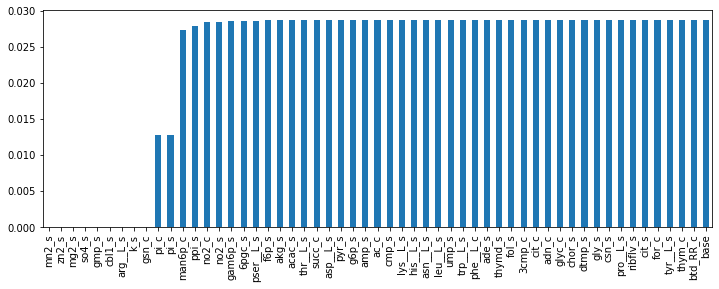

In [109]:
flux_results_df = pd.read_csv('group_KO_flux_results_{}.csv'.format(version),index_col=0)
flux_results_df.loc['biomass_dilution_s'].sort_values().plot.bar(figsize=(12 ,4))

In [107]:
flux_results_df = pd.read_csv('group_1by1_KO_flux_results_{}.csv'.format(version),index_col=0)
sorted_mets = flux_results_df.loc['biomass_dilution_s'].sort_values(ascending=True)
last_met = sorted_mets.index[list(sorted_mets.index).index(sorted_mets[sorted_mets<1e-5].index[-1])+1]
print(last_met)
flux_dict = flux_results_df[last_met].to_dict() # Last time before model breaks

thr__L_s


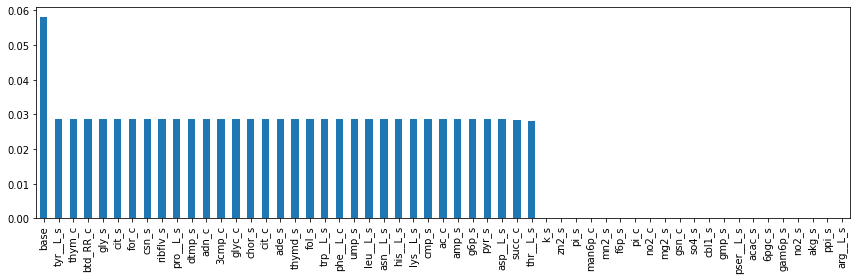

In [108]:
flux_results_df = pd.read_csv('group_1by1_KO_flux_results_{}.csv'.format(version),index_col=0)
flux_results_df.loc['biomass_dilution_s',sorted_mets.index[::-1]].plot.bar(figsize=(12,4))
plt.tight_layout()

In [110]:
flux_dict['biomass_dilution']

0.011462839961196077

In [111]:
met='atp_s' # ATP production and glucose uptake
prod_atp_df = flux_based_reactions(sporeme,met,flux_dict=flux_dict,only_types=['MetabolicReaction'])
prod_atp_df = prod_atp_df[prod_atp_df['met_flux']>0]
prod_atp_df['met_flux'].sum()

24.56360422878673

In [112]:
prod_atp_df['met_flux'].div(prod_atp_df['met_flux'].sum())

PRPPS_REV_BSU00510-MONOMER_mod_mn2_mod_pi_s        0.500522
ADK1_REV_BSU01370-MONOMER_mod_mg2_s                0.499333
ARGSS_REV_BSU29450-MONOMER_mod_mg2_s            9.02715e-05
URIDK2r_copy2_REV_BSU00280-MONOMER_mod_mg2_s    5.46958e-05
Name: met_flux, dtype: object

In [114]:
flux_based_reactions(sporeme,met,flux_dict=flux_dict,only_types=['MetabolicReaction'])

,lb,ub,rxn_flux,met_flux,reaction
PRPPS_REV_BSU00510-MONOMER_mod_mn2_mod_pi_s,0,999999,12.2946,12.2946,amp_s + h_s + prpp_s --> -1.38401264312306e-5*sigma BSU00510-MONOMER_mod_mn2_mod_pi_s + atp_s + r5p_s
ADK1_REV_BSU01370-MONOMER_mod_mg2_s,0,999999,12.2654,12.2654,2.0 adp_s --> -4.27350427350427e-6*sigma BSU01370-MONOMER_mod_mg2_s + amp_s + atp_s
PPIabc_FWD_CPLX_dummy_s,0,999999,12.1354,-12.1354,atp_s + h2o_s + ppi_c --> -4.27350427350427e-6*sigma CPLX_dummy_s + adp_s + h_s + pi_s + ppi_s
ACKr_FWD_BSU29470-MONOMER_s,0,999999,0.0737005,-0.0737005,ac_s + atp_s --> -4.27350427350427e-6*sigma BSU29470-MONOMER_s + actp_s + adp_s
NDPK2_FWD_BSU22730-MONOMER_mod_mn2_s,0,999999,0.0675318,-0.0675318,atp_s + udp_s --> -4.27350427350427e-6*sigma BSU22730-MONOMER_mod_mn2_s + adp_s + utp_s
...,...,...,...,...,...
ACKr_REV_BSU29470-MONOMER_s,0,0,0,0,actp_s + adp_s --> -4.27350427350427e-6*sigma BSU29470-MONOMER_s + ac_s + atp_s
FACOAL150_anteiso_REV_BSU18250-MONOMER_s,0,999999,0,0,amp_s + fa4coa_s + ppi_s --> -4.27350427350427e-6*sigma BSU18250-MONOMER_s + atp_s + coa_s + fa4_s
FACOAL150_anteiso_FWD_BSU18250-MONOMER_s,0,999999,0,-0,atp_s + coa_s + fa4_s --> -4.27350427350427e-6*sigma BSU18250-MONOMER_s + amp_s + fa4coa_s + ppi_s
FACOAL160_REV_BSU28560-MONOMER_mod_mg2_s,0,999999,0,0,amp_s + pmtcoa_s + ppi_s --> -4.27350427350427e-6*sigma BSU28560-MONOMER_mod_mg2_s + atp_s + coa_s + hdca_s


In [115]:
flux_based_reactions(sporeme,'prpp_s',flux_dict=flux_dict,only_types=['MetabolicReaction'])

,lb,ub,rxn_flux,met_flux,reaction
GUAPRT_REV_BSU00680-MONOMER_s,0,999999,12.2991,12.2991,gmp_s + ppi_s --> -4.27350427350427e-6*sigma BSU00680-MONOMER_s + gua_s + prpp_s
PRPPS_REV_BSU00510-MONOMER_mod_mn2_mod_pi_s,0,999999,12.2946,-12.2946,amp_s + h_s + prpp_s --> -1.38401264312306e-5*sigma BSU00510-MONOMER_mod_mn2_mod_pi_s + atp_s + r5p_s
ORPT_REV_BSU15560-MONOMER_s,0,999999,0.00404941,-0.00404941,orot_s + prpp_s --> -1.86331330653874e-5*sigma BSU15560-MONOMER_s + orot5p_s + ppi_s
ATPPRT_FWD_BSU34920-MONOMER_s,0,999999,0.000298377,-0.000298377,atp_s + prpp_s --> -4.27350427350427e-6*sigma BSU34920-MONOMER_s + ppi_s + prbatp_s
ANPRT_FWD_BSU22670-MONOMER_s,0,999999,0.00012065,-0.00012065,anth_s + prpp_s --> -1.35361847172882e-5*sigma BSU22670-MONOMER_s + ppi_s + pran_s
NNDPR_FWD_BSU27860-MONOMER_mod_mg2_s,0,999999,5.98408e-10,-5.98408e-10,2.0 h_s + prpp_s + quln_s --> -2.4712036904137e-6*sigma BSU27860-MONOMER_mod_mg2_s + co2_s + nicrnt_s + ppi_s
PRPPS_FWD_BSU00510-MONOMER_mod_mn2_mod_pi_s,0,999999,0,0,atp_s + r5p_s --> -1.38401264312306e-5*sigma BSU00510-MONOMER_mod_mn2_mod_pi_s + amp_s + h_s + prpp_s
ADPT_FWD_BSU27610-MONOMER_mod_mg2_s,0,999999,0,-0,ade_s + prpp_s --> -1.30688922594939e-5*sigma BSU27610-MONOMER_mod_mg2_s + amp_s + ppi_s
NAPRT_REV_BSU31750-MONOMER_s,0,999999,0,0,nicrnt_s + ppi_s --> -2.68603911285977e-6*sigma BSU31750-MONOMER_s + h_s + nac_s + prpp_s
ATPPRT_REV_BSU34920-MONOMER_s,0,999999,0,0,ppi_s + prbatp_s --> -4.27350427350427e-6*sigma BSU34920-MONOMER_s + atp_s + prpp_s


In [116]:
sporeme.metabolites.prpp_s.name

'5-Phospho-alpha-D-ribose 1-diphosphate'